In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import time, datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from scipy.special import inv_boxcox


_ = -0.24827048987665554


def inverse_box(pred,test,l):
    results_pred = inv_boxcox(pred,l)
    results_test = inv_boxcox(test,l) 
    print("    Y_TEST            Y_RESULTS_PRED ")
    print("_______________________________________")
    for i in range(50):
        print(results_test[i], ": " ,results_pred[i])

In [2]:
data=pd.read_csv('./Ordinal_Encoding.csv')

In [3]:
data.drop(['price_unskewed_sqrt','price_unskewed','price'], axis=1, inplace=True)

In [4]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'dest_city_id',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox'],
      dtype='object')

In [5]:
# X = data.values[:,0:-1]
X = data.drop(columns=['price_unskewed_boxcox']).values
y = data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [5,9]
# }

# # Create the GradientBoostingRegressor model
# gbr = GradientBoostingRegressor(random_state=0)

# # Perform grid search
# grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print("Best parameters found:")
# print(grid_search.best_params_)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Make predictions on the test set using the best model
# y_pred = best_model.predict(X_test)
    
# # Evaluate the best model
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [12]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=200,max_depth=9,random_state=0)

# Perform grid search
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.01664576173498442


In [15]:
mean_y_pred = y_pred_gbr.mean()
percentage_accuracy_3 = (1.0 - (np.mean(rmse) / mean_y_pred)) * 100
percentage_accuracy_3

99.53969993556832

In [18]:
results_pred = inv_boxcox(y_pred_gbr,_)
results_test = inv_boxcox(y_test,_) 

real_mse = mean_squared_error(results_test, results_pred)

real_rmse = np.sqrt(real_mse)

### percentage_accuracy_xgb_business = (1 - (np.mean(rmse_xgb_business) / mean_price_business)) * 100
# target_range = np.max(results_pred) - np.min(results_pred)
# percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy_2 = (1.0 - (real_rmse / len(results_pred))) * 100
percentage_accuracy_2


95.09036937162433

In [9]:
rmse = np.sqrt(mse)
rmse

2945.778377025405

In [10]:
inverse_box(y_pred_gbr,y_test,_)


    Y_TEST            Y_RESULTS_PRED 
_______________________________________
41314.00000000004 :  44036.30137998562
6295.99999999999 :  5891.660458094515
10604.0 :  12909.837227881853
4796.000000000009 :  4801.055228707981
5955.000000000005 :  8477.344475723497
4873.000000000001 :  4359.565195773608
5231.999999999997 :  4937.652854889424
60396.00000000016 :  57357.65358477793
69243.99999999962 :  72020.36548539055
6074.9999999999945 :  6434.049842691634
2049.999999999999 :  2667.789159331217
4452.999999999995 :  4053.971090918919
6314.99999999999 :  5434.861169951507
84153.99999999987 :  70571.48532078703
3013.000000000004 :  2984.400849377843
64831.000000000124 :  62973.04406494831
1714.0000000000005 :  2016.6727229217117
6218.9999999999945 :  5907.451084086827
7489.000000000004 :  7943.078857352315
51817.00000000012 :  53873.45998870267
6600.0000000000355 :  7875.045339485517
5604.999999999991 :  5820.059316563477
62523.99999999985 :  60852.698923447875
3867.000000000007 :  4767.398

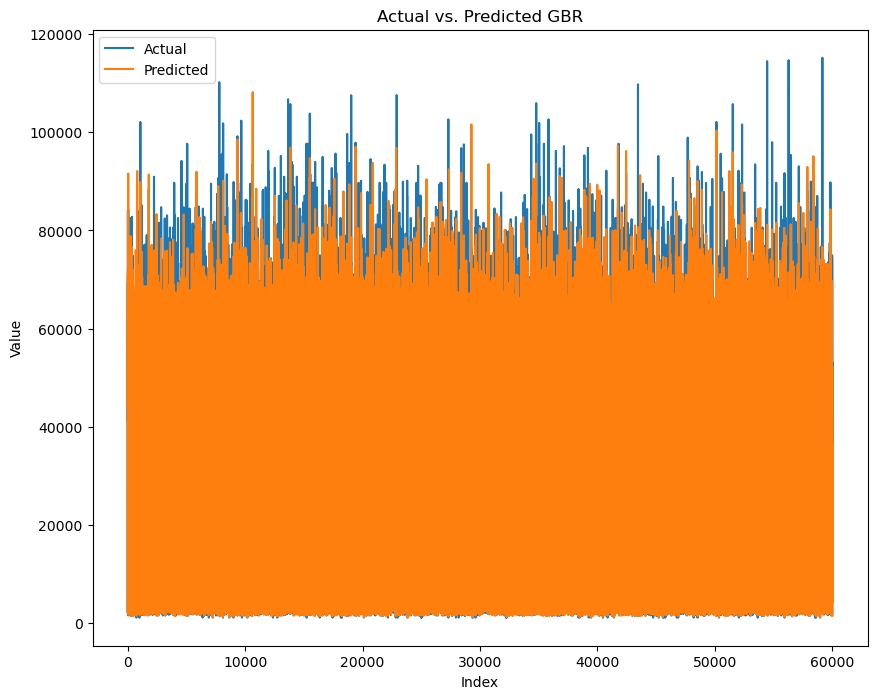

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(results_test, label='Actual')
plt.plot(results_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted GBR')
plt.legend()
plt.show()

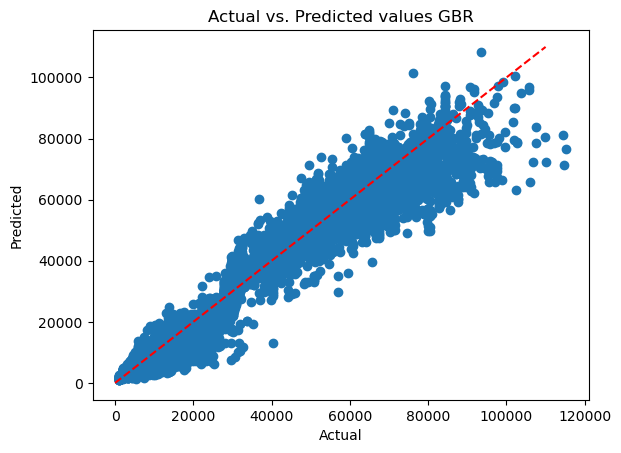

In [16]:

# Scatter plot of actual vs. predicted values
plt.scatter(results_test, results_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted values GBR")
# Plot the line x = y
x_values = range(110001)
# Plot the line y = x
plt.plot(x_values, x_values, color='red',linestyle='--' ,label='y = x')
plt.show()



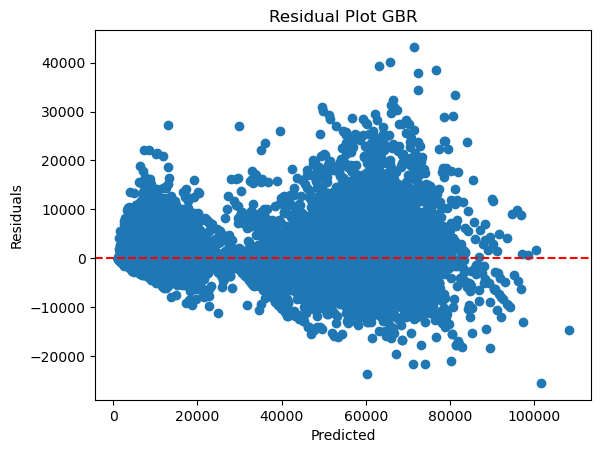

In [15]:
# Residual plot
residuals = results_test - results_pred
plt.scatter(results_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot GBR")
plt.show()